In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import api_key

from citipy import citipy

output = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)



ModuleNotFoundError: No module named 'api_keys'

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
cities

query_url =  f"{url}appid={api_key}&units={units}&q="

In [4]:
# use iterrows to iterate through pandas dataframe
citylist = []
lat = []          
lng = []             
maxtemp = []       
humidity = []       
cloudiness = []      
windspeed = []   
country  = []        
date  = []   

count = 0
set_ = 1
print("-------------------") 
print("Beginning Data Retrieval") 
print("-------------------") 
for city in cities:
    try:
        response= requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])       
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])       
        humidity.append(response["main"]["humidity"])    
        cloudiness.append(response["clouds"]["all"])     
        windspeed.append(response["wind"]["speed"]) 
        country.append(response["sys"]["country"])      
        date.append(response["dt"]) 
        if  count  > 48:
            count = 1
            set_ = set_ + 1
            citylist.append(city)
        else:
            count = count + 1
            citylist.append(city)
            
        print(f"Processing Record {count} of Set {set_} | {city}")

        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------") 
print("Data Retrieval Complete") 
print("-------------------") 


-------------------
Beginning Data Retrieval
-------------------
Processing Record 1 of Set 1 | castro
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 1 | isangel
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | san ramon
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | nabire
Processing Record 7 of Set 1 | port alfred
City not found. Skipping...
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | lebork
Processing Record 10 of Set 1 | olinda
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | broome
Processing Record 14 of Set 1 | bon air
City not found. Skipping...
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | mackenzie
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | sao filipe
Proces

Processing Record 40 of Set 4 | cuxhaven
Processing Record 41 of Set 4 | teya
Processing Record 42 of Set 4 | flin flon
City not found. Skipping...
Processing Record 43 of Set 4 | longyearbyen
City not found. Skipping...
Processing Record 44 of Set 4 | dingle
Processing Record 45 of Set 4 | bilibino
Processing Record 46 of Set 4 | taoudenni
Processing Record 47 of Set 4 | honiara
Processing Record 48 of Set 4 | gulu
Processing Record 49 of Set 4 | wukari
Processing Record 1 of Set 5 | mlonggo
Processing Record 2 of Set 5 | bodden town
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | hualmay
Processing Record 5 of Set 5 | sechura
City not found. Skipping...
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | abu dhabi
Processing Record 8 of Set 5 | faya
Processing Record 9 of Set 5 | mount hagen
Processing Record 10 of Set 5 | pangoa
Processing Record 11 of Set 5 | sembakung
Processing Record 12 of Set 5 | akureyri
Processing Record 13 of Set 5 | 

Processing Record 30 of Set 8 | norman wells
City not found. Skipping...
Processing Record 31 of Set 8 | boundiali
Processing Record 32 of Set 8 | kokemaki
Processing Record 33 of Set 8 | road town
City not found. Skipping...
Processing Record 34 of Set 8 | kaduna
Processing Record 35 of Set 8 | salinopolis
Processing Record 36 of Set 8 | cozumel
Processing Record 37 of Set 8 | chumikan
Processing Record 38 of Set 8 | lagoa
Processing Record 39 of Set 8 | marienburg
Processing Record 40 of Set 8 | talavera
Processing Record 41 of Set 8 | palu
Processing Record 42 of Set 8 | varhaug
Processing Record 43 of Set 8 | valdivia
Processing Record 44 of Set 8 | bardiyah
Processing Record 45 of Set 8 | isla mujeres
Processing Record 46 of Set 8 | kenai
Processing Record 47 of Set 8 | humberto de campos
Processing Record 48 of Set 8 | opuwo
Processing Record 49 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 9 | marsa matruh
Processing Record 2 of Set 9 | mount isa
Processing Rec

In [9]:
weather_dict = {"City": citylist, 
"Latitude": lat,     
"Longitude": lng,            
"Max Temp": maxtemp,     
"Humidity": humidity,  
"Cloudiness": cloudiness,     
"Windspeed": windspeed,
"Country": country,      
"Date": date }
weather_data.count()

City          550
Latitude      550
Longitude     550
Max Temp      550
Humidity      550
Cloudiness    550
Windspeed     550
Country       550
Date          550
dtype: int64

In [7]:
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,castro,-24.79,-50.01,53.11,83,0,3.58,BR,1595585182
1,isangel,-19.55,169.27,73.42,84,48,11.27,VU,1595585195
2,yellowknife,62.46,-114.35,53.60,100,90,8.05,CA,1595585181
3,san ramon,37.78,-121.98,60.01,87,1,8.05,US,1595585503
4,ushuaia,-54.80,-68.30,35.60,93,75,32.21,AR,1595585006


In [10]:
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,20.914473,17.021509,71.143255,67.818182,49.903636,8.145836,1.595585e+09
std,33.044074,89.685445,14.442461,23.244790,36.963673,5.745465,1.900266e+02
min,-54.800000,-175.200000,28.400000,1.000000,0.000000,0.200000,1.595585e+09
25%,-6.385000,-62.652500,62.537500,52.000000,18.250000,4.235000,1.595585e+09
50%,22.720000,20.600000,72.425000,75.000000,47.000000,6.855000,1.595586e+09
75%,48.245000,89.797500,81.105000,87.000000,89.750000,10.320000,1.595586e+09
max,78.220000,179.320000,109.240000,100.000000,100.000000,33.330000,1.595586e+09


In [11]:
# HAVE NO CITIES WITH HUMIDITY OVER 100

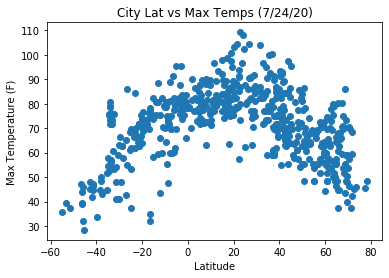

In [14]:
lat = weather_data["Latitude"]
temp = weather_data["Max Temp"]
plt.scatter(lat,temp)
plt.title("City Lat vs Max Temps (7/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

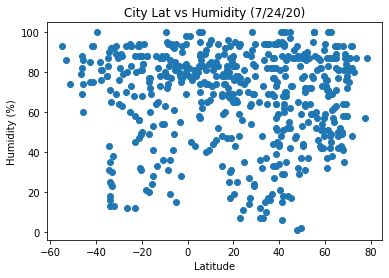

In [16]:
lat = weather_data["Latitude"]
humid = weather_data["Humidity"]
plt.scatter(lat,humid)
plt.title("City Lat vs Humidity (7/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

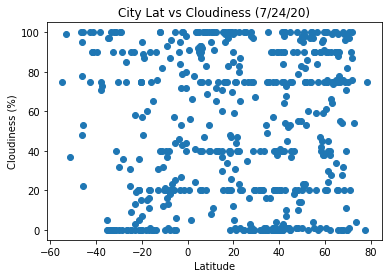

In [17]:
lat = weather_data["Latitude"]
cloud = weather_data["Cloudiness"]
plt.scatter(lat,cloud)
plt.title("City Lat vs Cloudiness (7/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

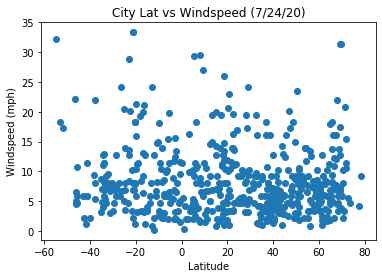

In [18]:
lat = weather_data["Latitude"]
wind = weather_data["Windspeed"]
plt.scatter(lat,wind)
plt.title("City Lat vs Windspeed (7/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.show()

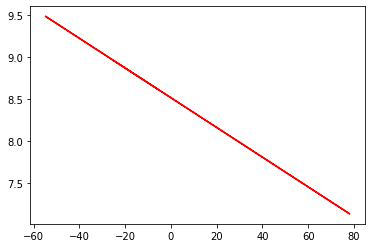

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,wind)
regress = lat*slope + intercept
plt.plot(lat, regress, "r-")

In [26]:
northern = weather_data.loc[weather_data["Latitude"] > 0, :]
northern

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
2,yellowknife,62.46,-114.35,53.60,100,90,8.05,CA,1595585181
3,san ramon,37.78,-121.98,60.01,87,1,8.05,US,1595585503
8,lebork,54.54,17.75,68.00,59,100,13.87,PL,1595585352
10,albany,42.60,-73.97,68.00,78,100,3.71,US,1595585171
12,broome,42.25,-75.83,66.99,100,90,3.36,US,1595585198
...,...,...,...,...,...,...,...,...,...
543,talas,38.69,35.55,82.40,39,0,4.70,TR,1595585632
544,talaya,61.38,152.75,65.39,51,24,1.07,RU,1595585528
545,konstantinovka,49.62,127.98,82.44,59,14,14.90,RU,1595585632
546,vaijapur,19.92,74.73,82.71,69,85,11.90,IN,1595585632


In [27]:
southern = weather_data.loc[weather_data["Latitude"] < 0, :]
southern

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,castro,-24.79,-50.01,53.11,83,0,3.58,BR,1595585182
1,isangel,-19.55,169.27,73.42,84,48,11.27,VU,1595585195
4,ushuaia,-54.80,-68.30,35.60,93,75,32.21,AR,1595585006
5,nabire,-3.37,135.48,79.93,78,95,1.95,ID,1595585503
6,port alfred,-33.59,26.89,76.05,24,0,7.58,ZA,1595585190
...,...,...,...,...,...,...,...,...,...
525,trairi,-3.28,-39.27,75.78,79,84,11.72,BR,1595585303
529,sawtell,-30.38,153.10,59.00,87,75,8.05,AU,1595585208
536,clevelandia,-26.40,-52.47,55.09,80,0,6.67,BR,1595585630
548,itarema,-2.92,-39.92,77.04,77,72,15.59,BR,1595585193


The r-squared is: 0.41006497282834015


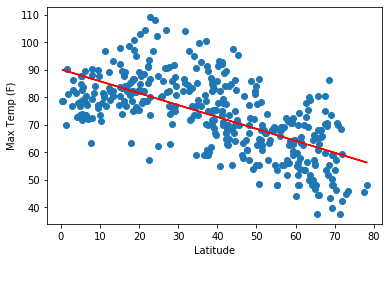

In [44]:
maxtempn = northern["Max Temp"]
latn = northern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,maxtempn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,maxtempn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.4674102908233578


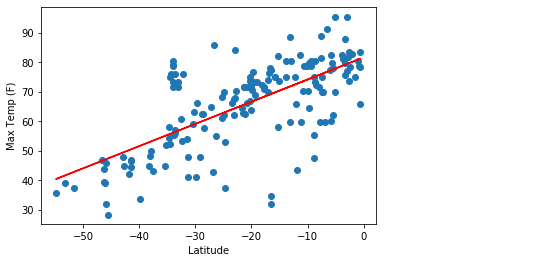

In [43]:
maxtemps = southern["Max Temp"]
lats = southern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats,maxtemps)
regress = lats*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lats,maxtemps)
plt.plot(lats, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0014698599162331785


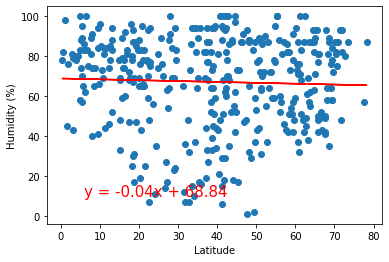

In [41]:
humidityn = northern["Humidity"]
latn = northern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,humidityn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,humidityn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00022488730790753292


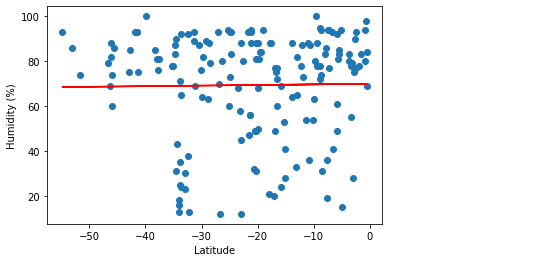

In [40]:
humiditys = southern["Humidity"]
lats = southern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats,humiditys)
regress = lats*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lats,humiditys)
plt.plot(lats, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.000935851376277393


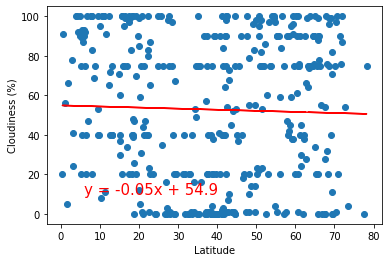

In [42]:
cloudn = northern["Cloudiness"]
latn = northern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,cloudn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,cloudn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.013140810435865584


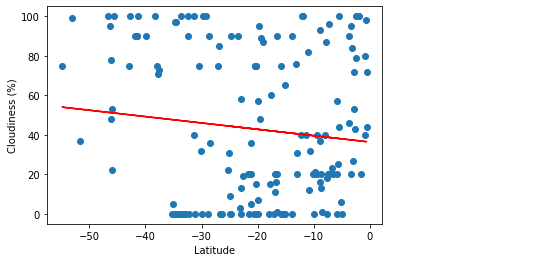

In [47]:
humiditys = southern["Cloudiness"]
lats = southern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats,humiditys)
regress = lats*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lats,humiditys)
plt.plot(lats, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0002610817236325191


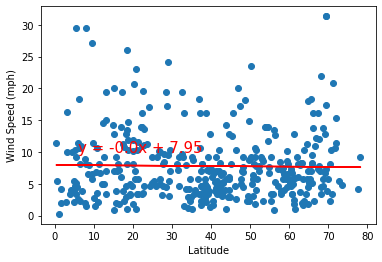

In [50]:
windn = northern["Windspeed"]
latn = northern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,windn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,windn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.012855008763530332


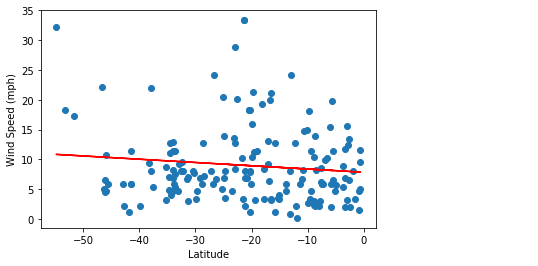

In [51]:
windn = southern["Windspeed"]
latn = southern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,windn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,windn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()